<a href="https://colab.research.google.com/github/jubayer27/AI_Text_Summarizer/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#use torch.range()
import torch
from torch import nn #nn is a building blocks
import matplotlib.pyplot as plt

## Data Preparing and Loading

we will use a linear regrassion formulla  too make a straight line with known parameters

In [2]:
weight =0.7
bias = 0.3

#create

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1) #create one ccolumn dataset
y = weight* X+bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Spliting data into training and test sets


In [3]:
# Create a train/test split

train_split = int(0.8 * len(X))

X_train , y_train = X[:train_split] , y[: train_split]
X_test , y_test = X[train_split: ], y[train_split: ]

len(X_train), len(y_train)


(40, 40)

In [4]:
## Visualized data of Test and Training set

def plot_prediction(train_data = X_train,
                    train_lables = y_train,
                    test_data = X_test,
                    test_lables = y_test,
                    predictions = None):
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter (train_data, train_lables, c="b", s=4, label = "Training Data")

  #plot tesst data in green
  plt.scatter (test_data, test_lables, c="g", s=4 , label = "Test Data")

  #check prediction

  if predictions is not None:
    plt.scatter (test_data, predictions, c="r", s=4, label ="Prediction")

  #display legend

  plt.legend(prop = {"size":10})


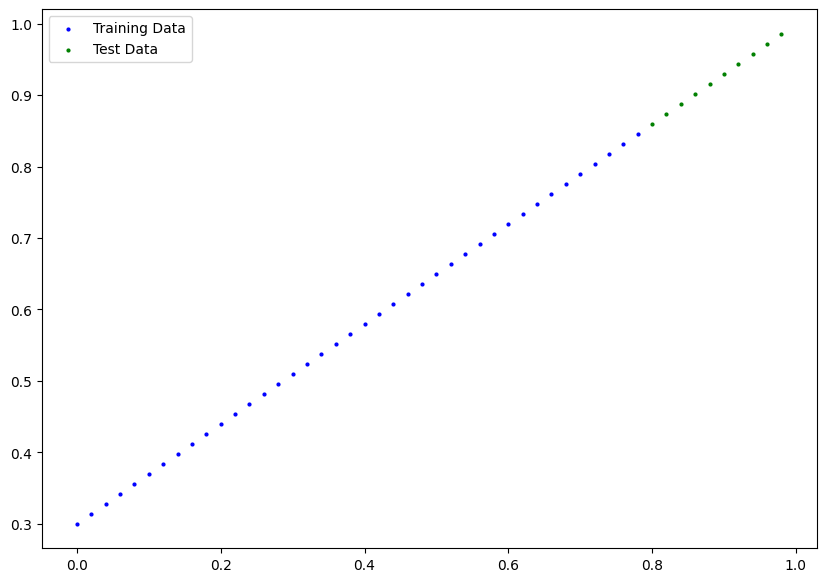

In [5]:
plot_prediction()

In [6]:
#build first model


#creating a liniar regression model class

class LinearRegrassionModel (nn.Module): #nn.Module is inherits almost all classes in Pytorch
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype= torch.float
                                        ))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype = torch.float))

    #forword methode to define the model

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weight*x + self.bias #this is the liniar regression formula





In [7]:
#creating a random seed
torch.manual_seed(42)

#creating instant for the model class
model_0 = LinearRegrassionModel()

list(model_0.parameters())

#list named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

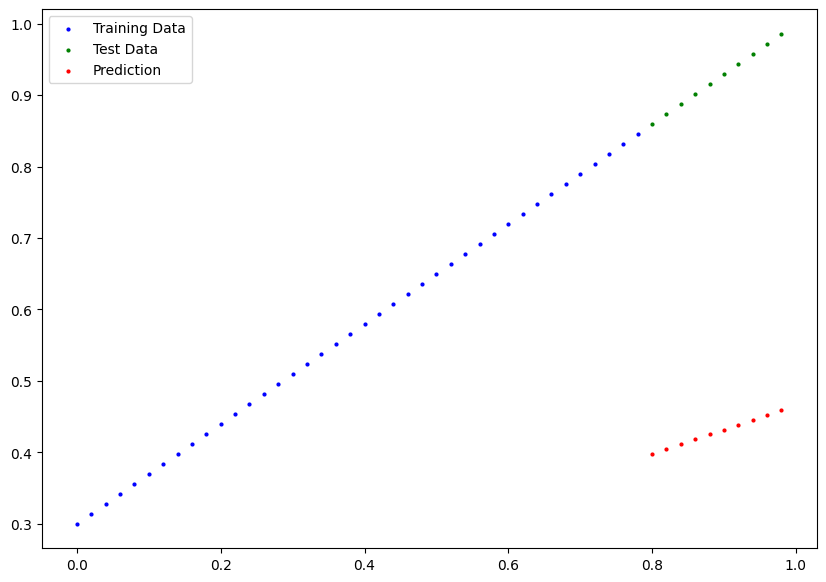

In [9]:
#making prediction with our model by X_test values

with torch.inference_mode():
  y_predict = model_0(X_test)

  plot_prediction(predictions=y_predict)


In [10]:
#setup loss function

loss_fn = nn.L1Loss()

#SETUP Optimizer
optimiz = torch.optim.SGD(model_0.parameters(), #optimizer adjust the parameters to get best value
                          lr= 0.01) #lr = learning rate


#training loop